<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

Reference: https://youtu.be/kwKfWBb6frs?si=IUmqKy_6M_Ot5ecl

Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [202]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [203]:
img = cv2.imread('./test_images/ab.jpg')
img.shape

(2100, 1500, 3)

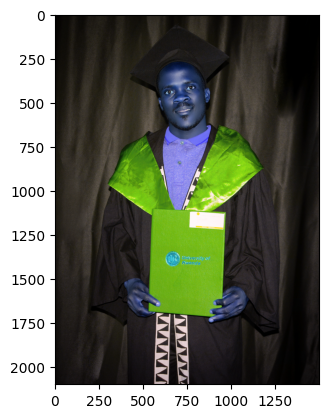

In [204]:
plt.imshow(img)

In [205]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2100, 1500)

In [206]:
gray

array([[ 2,  1,  1, ...,  0,  0,  1],
       [ 1,  2,  2, ...,  1,  1,  1],
       [ 2,  3,  3, ...,  1,  1,  0],
       ...,
       [ 7, 10,  9, ..., 15, 15, 15],
       [ 9,  9,  9, ..., 12, 13, 15],
       [ 8,  8,  9, ..., 13, 12, 13]], dtype=uint8)

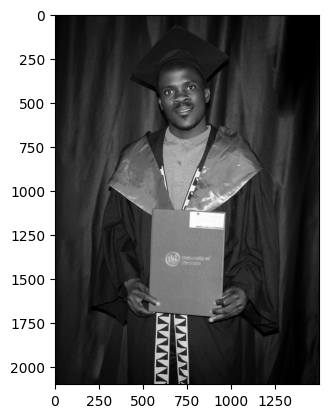

In [207]:
plt.imshow(gray, cmap='gray')

Detecting Face by haar Library

In [208]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

# x, y, w, h of a face

array([[560, 305, 331, 331]])

In [209]:
(x,y,w,h) = faces[0]
x,y,w,h

(560, 305, 331, 331)

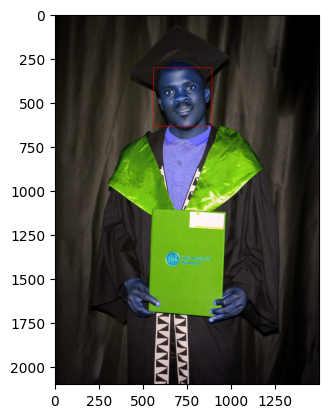

In [210]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

IMAGE CROPPING

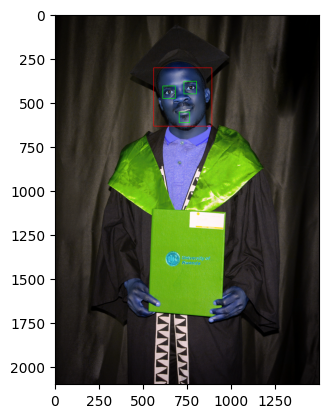

In [211]:
# cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

IMAGE CROPPING

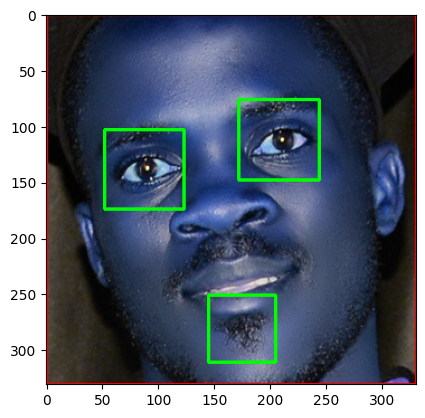

In [212]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [213]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            # When faces are visible
            return roi_color

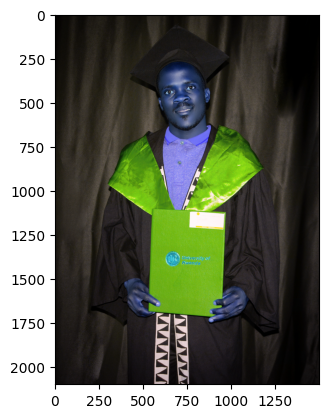

In [214]:
original_image = cv2.imread('./test_images/ab.jpg')
plt.imshow(original_image)

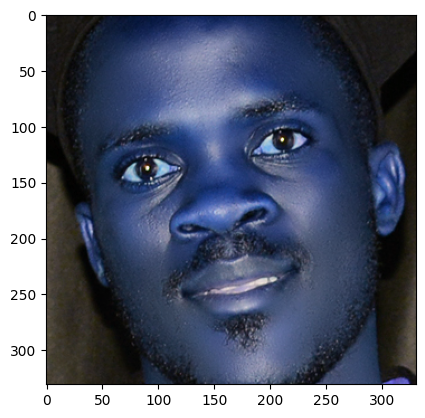

In [215]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/ab.jpg')
plt.imshow(cropped_image)

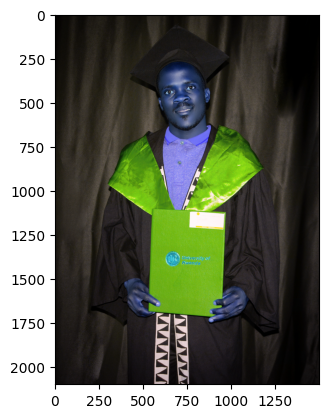

In [216]:
org_image_obstructed = cv2.imread('./test_images/ab.jpg')
plt.imshow(org_image_obstructed)

In [217]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

<!-- CREATE FOLDER FOR CROPPED IMAGES -->

In [218]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [219]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [220]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

Check if folder exist then remove it

In [221]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)# Create folder

In [222]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        # When faces are visible
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder): #if folder not exist, create it
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)# append the cropped folder
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 #increment images number to their original names (cropped_file_path,roi_color)

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi


maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
